## This is a notebook for making the redshift from the comoving distance from the CLASS background file

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.interpolate import interp1d
import scipy.interpolate as spi

import seaborn as sns
color_pal = sns.color_palette("colorblind", 18).as_hex()
ColorsI = color_pal
# ColorsI = ["red","green","blue","black","cyan","magenta","purple","orange","brown","pink"]

In [23]:
cs1 = np.loadtxt("./Runs_alpha_K_CLASS_hiCLASS_comparison/hi_cs2_perturbations_k0_s.dat")
cs2_em7 = np.loadtxt("./Runs_alpha_K_CLASS_hiCLASS_comparison/hi_cs2_em7_perturbations_k0_s.dat")

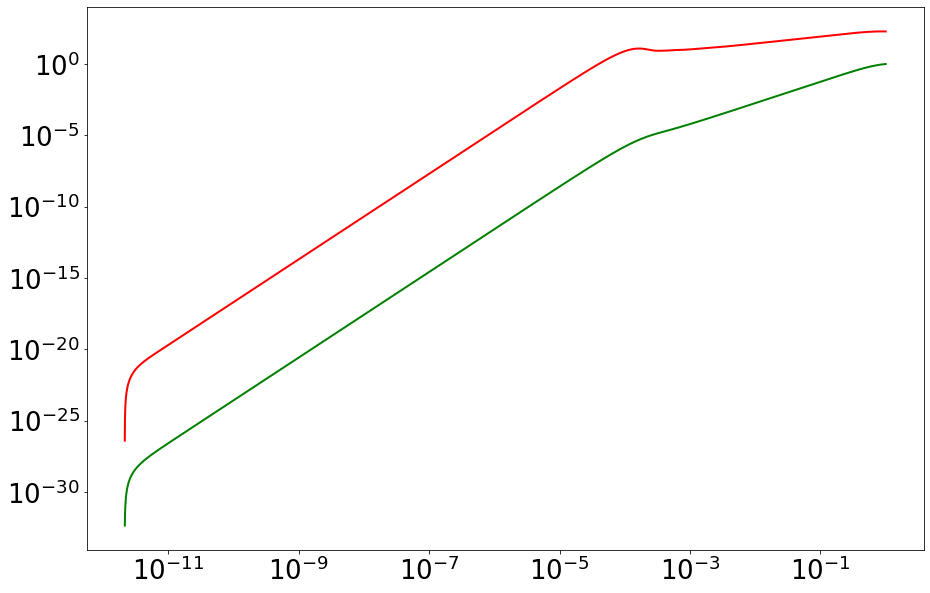

In [26]:
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 26)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
l=0

plt.loglog(cs1[:,1], cs1[:,17],"-",color="red",lw=2, label=r"$\pi_{synch} (hiclass)$, $z=$"+str(z_pk[i]))
plt.loglog(cs2_em7[:,1], cs2_em7[:,17],"-",color="green",lw=2, label=r"$\pi_{synch} (hiclass)$, $z=$"+str(z_pk[i]))



In [13]:
# Synchronous
z_pk = [100.0,50.0,20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0]

class_synch_cs1 =[]
class_synch_cs2_em7 =[]
class_synch_cs2_em2=[]

class_cs1 =[]
class_cs2_em7 =[]
class_cs2_em2=[]

hiclass_cs1 =[]
hiclass_cs2_em7 =[]
hiclass_cs2_em2=[]
for i in range (np.shape(z_pk)[0]):
    class_synch_cs1.append(np
                           .loadtxt("./Runs_alpha_K_CLASS_hiCLASS_comparison/CLASS_synch_cs_1///class_cs2_z"+str(i+1)+"_tk.dat"));
    class_synch_cs2_em7.append(np.loadtxt("./Runs_alpha_K_CLASS_hiCLASS_comparison/CLASS_synch_cs2_em7/class_cs2_z"+str(i+1)+"_tk.dat"));
    class_synch_cs2_em2.append(np.loadtxt("./Runs_alpha_K_CLASS_hiCLASS_comparison/CLASS_synch_cs2_em2//class_cs2_z"+str(i+1)+"_tk.dat"));

    class_cs1.append(np.loadtxt("./Runs_alpha_K_CLASS_hiCLASS_comparison/CLASS_cs_1///class_cs2_z"+str(i+1)+"_tk.dat"));
    class_cs2_em7.append(np.loadtxt("./Runs_alpha_K_CLASS_hiCLASS_comparison/CLASS_synch_cs2_em7//class_cs2_z"+str(i+1)+"_tk.dat"));
    class_cs2_em2.append(np.loadtxt("./Runs_alpha_K_CLASS_hiCLASS_comparison/CLASS_synch_cs2_em2//class_cs2_z"+str(i+1)+"_tk.dat"));

    hiclass_cs1.append(np.loadtxt("./Runs_alpha_K_CLASS_hiCLASS_comparison/hi_class_cs_1///hi_cs2_z"+str(i+1)+"_tk.dat"));
    hiclass_cs2_em7.append(np.loadtxt("./Runs_alpha_K_CLASS_hiCLASS_comparison/hi_class_cs2_em7//hi_cs2_z"+str(i+1)+"_tk.dat"));
    hiclass_cs2_em2.append(np.loadtxt("./Runs_alpha_K_CLASS_hiCLASS_comparison/hi_class_cs2_em2///hi_cs2_z"+str(i+1)+"_tk.dat"));


In [14]:
# CLASS synch

#    1:k (h/Mpc)              2:d_g                    3:d_b                    4:d_cdm                  5:d_fld                  6:d_ur                   7:d_tot                  8:phi                    9:psi                   10:t_g                   11:t_b                   12:t_fld                 13:t_ur                  14:t_tot              


# CLASS Newtonian

#    1:k (h/Mpc)              2:d_g                    3:d_b                    4:d_cdm                  5:d_fld                  6:d_ur                   7:d_tot                  8:phi                    9:psi                   10:t_g                   11:t_b                   12:t_cdm                 13:t_fld                 14:t_ur                  15:t_tot              



# hiclass 
#    1:k (h/Mpc)              2:d_g                    3:d_b                    4:d_cdm                  5:d_ur                   6:vx_smg                 7:vx_prime_smg           8:d_tot                  9:phi                   10:psi                   11:t_g                   12:t_b                   13:t_ur                  14:t_tot              


In [15]:
h = 0.67556;
pi_synch_class_cs1=[]
pi_newt_class_cs1=[]
alpha_cs1 =[]

pi_synch_class_cs2_em2 =[]
pi_newt_class_cs2_em2=[]
alpha_cs2_em2=[]

pi_synch_class_cs2_em7 =[]
pi_newt_class_cs2_em7=[]
alpha_cs2_em7=[]

# pi_newt = pi_synch + alpha
# theta_newt  = theta_synch + alpha k^2
for i in range (np.shape(z_pk)[0]):

    pi_synch_class_cs1.append(np.array(class_synch_cs1[i][:,11]/(class_synch_cs1[i][:,0]*h)**2)) # pi_synch = theta_synch (CLASS)/k^2
    pi_newt_class_cs1.append(class_cs1[i][:,12]/((class_cs1[i][:,0]*h)**2));
    alpha_cs1.append(pi_newt_class_cs1[i] - pi_synch_class_cs1[i]);
    
    ##############
    pi_synch_class_cs2_em2.append(np.array(class_synch_cs2_em2[i][:,11]/(class_synch_cs2_em2[i][:,0]*h)**2)) # pi_synch = theta_synch (CLASS)/k^2
    pi_newt_class_cs2_em2.append(class_cs2_em2[i][:,12]/((class_cs2_em2[i][:,0]*h)**2));
    alpha_cs2_em2.append(pi_newt_class_cs2_em2[i] - pi_synch_class_cs2_em2[i]);
    
    ###############
    pi_synch_class_cs2_em7.append(np.array(class_synch_cs2_em7[i][:,11]/(class_synch_cs2_em7[i][:,0]*h)**2)) # pi_synch = theta_synch (CLASS)/k^2
    pi_newt_class_cs2_em7.append(class_cs2_em7[i][:,12]/((class_cs2_em7[i][:,0]*h)**2));
    alpha_cs2_em7.append(pi_newt_class_cs2_em7[i] - pi_synch_class_cs2_em7[i]);


In [ ]:

#########
####Plots
#########
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 26)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
l=0

for i in [19]:
    plt.plot(hiclass_cs1[i][:,0], -(hiclass_cs1[i][:,5]),"-",color=ColorsI[l+1],lw=2, label=r"$\pi_{synch} (hiclass)$, $z=$"+str(z_pk[i]))
    plt.plot(class_synch_cs1[i][:,0], -(pi_synch_class_cs1[i][:]),"-",color=ColorsI[l+0],lw=2, label=r"$\pi_{synch} (CLASS)$, $z=$"+str(z_pk[i]))
    plt.plot(class_cs1[i][:,0], -(pi_newt_class_cs1[i][:] - alpha_cs1[i][:]),"-",color=ColorsI[l+2],lw=2, label=r"$\pi_{Newt}(CLASS)  - \alpha $, $z=$"+str(z_pk[i]))
    l=l+1
#     plt.plot(class_synch_cs1[i][:,0], (pi_synch_class_cs1[i][:]),"-",color=ColorsI[l+0],lw=2, label=r"$\alpha_B=0$, $z=$"+z_pk[i])


#     plt.semilogx(wcdm_w_m0d9_cs1_Mn_0d06[i][:,0], (wcdm_w_m0d9_cs1_Mn_0d06[i][:,column_wcdm]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1_Mn_0d06[i][:,0]))**power,color=ColorsI[l+5],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=1, \sum m_{\nu} = 0.06$ eV, z="+str(z_list[i]))
#     plt.semilogx(wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,0], (wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,column_wcdm]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,0]))**power,color=ColorsI[l+4],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=10^{-7}, \sum m_{\nu} = 0.06$ eV, z="+str(z_list[i]))

# plt.xlim(1e-4,1)
# plt.ylim(0.5,1.5)
plt.title("$c_s^2=1$",fontsize=26)
plt.xscale('log')
plt.xlabel(r"$k$ [h/Mpc]",fontsize=28)
plt.ylabel(r"$\pi(k)$",fontsize=28)
plt.yscale('log')
plt.legend(fontsize=24)
plt.grid(True)
plt.tight_layout()
plt.show()


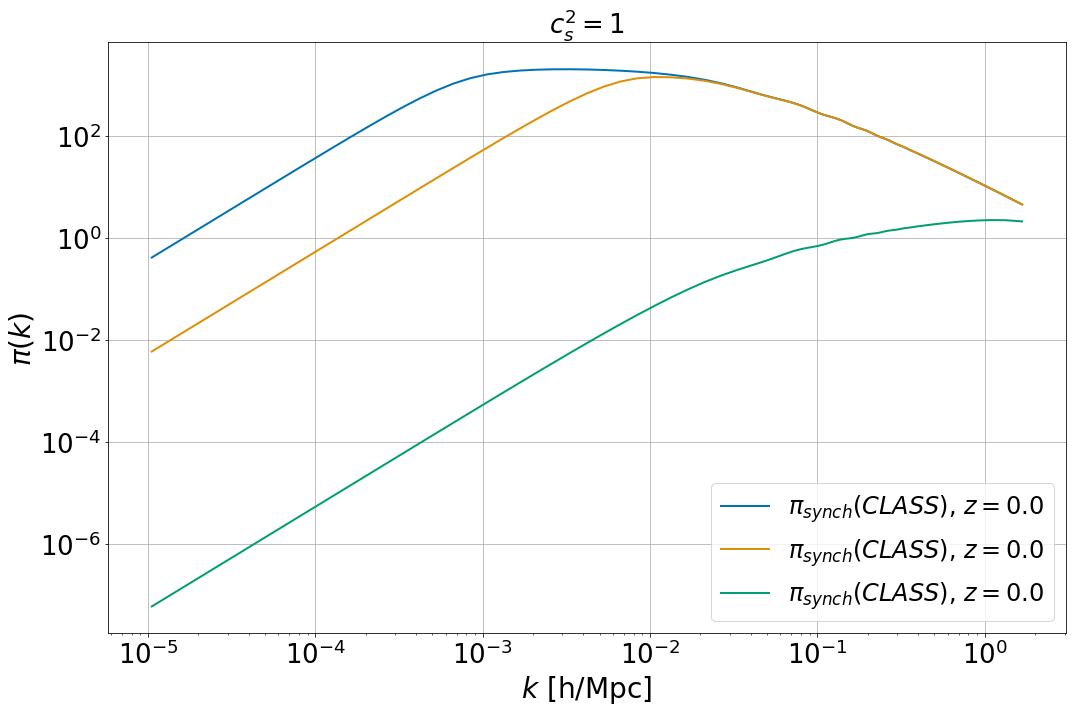

In [27]:

#########
####Plots
#########
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 26)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
l=0

for i in [19]:
#     plt.plot(hiclass_cs1[i][:,0], -(hiclass_cs1[i][:,5]),"-",color=ColorsI[l+1],lw=2, label=r"$\pi_{synch} (hiclass)$, $z=$"+str(z_pk[i]))
    plt.plot(class_synch_cs1[i][:,0], -(pi_synch_class_cs1[i][:]),"-",color=ColorsI[l+0],lw=2, label=r"$\pi_{synch} (CLASS)$, $z=$"+str(z_pk[i]))
#     plt.plot(class_cs1[i][:,0], -(pi_newt_class_cs1[i][:] - alpha_cs1[i][:]),"-",color=ColorsI[l+2],lw=2, label=r"$\pi_{Newt}(CLASS)  - \alpha $, $z=$"+str(z_pk[i]))
    plt.plot(class_synch_cs1[i][:,0], -(pi_synch_class_cs2_em2[i][:]),"-",color=ColorsI[l+1],lw=2, label=r"$\pi_{synch} (CLASS)$, $z=$"+str(z_pk[i]))
    plt.plot(class_synch_cs1[i][:,0], -(pi_synch_class_cs2_em7[i][:]),"-",color=ColorsI[l+2],lw=2, label=r"$\pi_{synch} (CLASS)$, $z=$"+str(z_pk[i]))

    l=l+1
#     plt.plot(class_synch_cs1[i][:,0], (pi_synch_class_cs1[i][:]),"-",color=ColorsI[l+0],lw=2, label=r"$\alpha_B=0$, $z=$"+z_pk[i])


#     plt.semilogx(wcdm_w_m0d9_cs1_Mn_0d06[i][:,0], (wcdm_w_m0d9_cs1_Mn_0d06[i][:,column_wcdm]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1_Mn_0d06[i][:,0]))**power,color=ColorsI[l+5],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=1, \sum m_{\nu} = 0.06$ eV, z="+str(z_list[i]))
#     plt.semilogx(wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,0], (wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,column_wcdm]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,0]))**power,color=ColorsI[l+4],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=10^{-7}, \sum m_{\nu} = 0.06$ eV, z="+str(z_list[i]))

# plt.xlim(1e-4,1)
# plt.ylim(0.5,1.5)
plt.title("$c_s^2=1$",fontsize=26)
plt.xscale('log')
plt.xlabel(r"$k$ [h/Mpc]",fontsize=28)
plt.ylabel(r"$\pi(k)$",fontsize=28)
plt.yscale('log')
plt.legend(fontsize=24)
plt.grid(True)
plt.tight_layout()
plt.show()


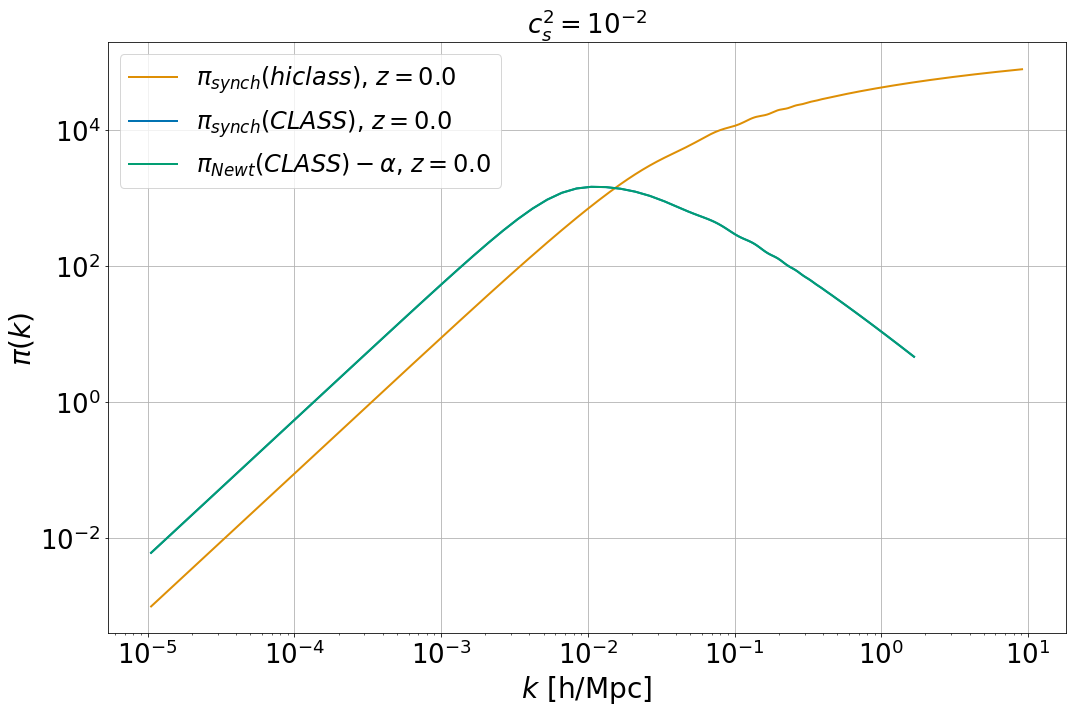

In [17]:

#########
####Plots
#########
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 26)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
l=0

for i in [19]:
    plt.plot(hiclass_cs2_em2[i][:,0], -(hiclass_cs2_em2[i][:,5]),"-",color=ColorsI[l+1],lw=2, label=r"$\pi_{synch} (hiclass)$, $z=$"+str(z_pk[i]))
    plt.plot(class_synch_cs2_em2[i][:,0], -(pi_synch_class_cs2_em2[i][:]),"-",color=ColorsI[l+0],lw=2, label=r"$\pi_{synch} (CLASS)$, $z=$"+str(z_pk[i]))
    plt.plot(class_cs2_em2[i][:,0], -(pi_newt_class_cs2_em2[i][:] - alpha_cs2_em2[i][:]),"-",color=ColorsI[l+2],lw=2, label=r"$\pi_{Newt}(CLASS)  - \alpha $, $z=$"+str(z_pk[i]))
    l=l+1
#     plt.plot(class_synch_cs1[i][:,0], (pi_synch_class_cs1[i][:]),"-",color=ColorsI[l+0],lw=2, label=r"$\alpha_B=0$, $z=$"+z_pk[i])


#     plt.semilogx(wcdm_w_m0d9_cs1_Mn_0d06[i][:,0], (wcdm_w_m0d9_cs1_Mn_0d06[i][:,column_wcdm]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1_Mn_0d06[i][:,0]))**power,color=ColorsI[l+5],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=1, \sum m_{\nu} = 0.06$ eV, z="+str(z_list[i]))
#     plt.semilogx(wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,0], (wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,column_wcdm]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,0]))**power,color=ColorsI[l+4],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=10^{-7}, \sum m_{\nu} = 0.06$ eV, z="+str(z_list[i]))

# plt.xlim(1e-4,1)
# plt.ylim(0.5,1.5)
plt.title("$c_s^2=10^{-2}$",fontsize=26)
plt.xscale('log')
plt.xlabel(r"$k$ [h/Mpc]",fontsize=28)
plt.ylabel(r"$\pi(k)$",fontsize=28)
plt.yscale('log')
plt.legend(fontsize=24)
plt.grid(True)
plt.tight_layout()
plt.show()


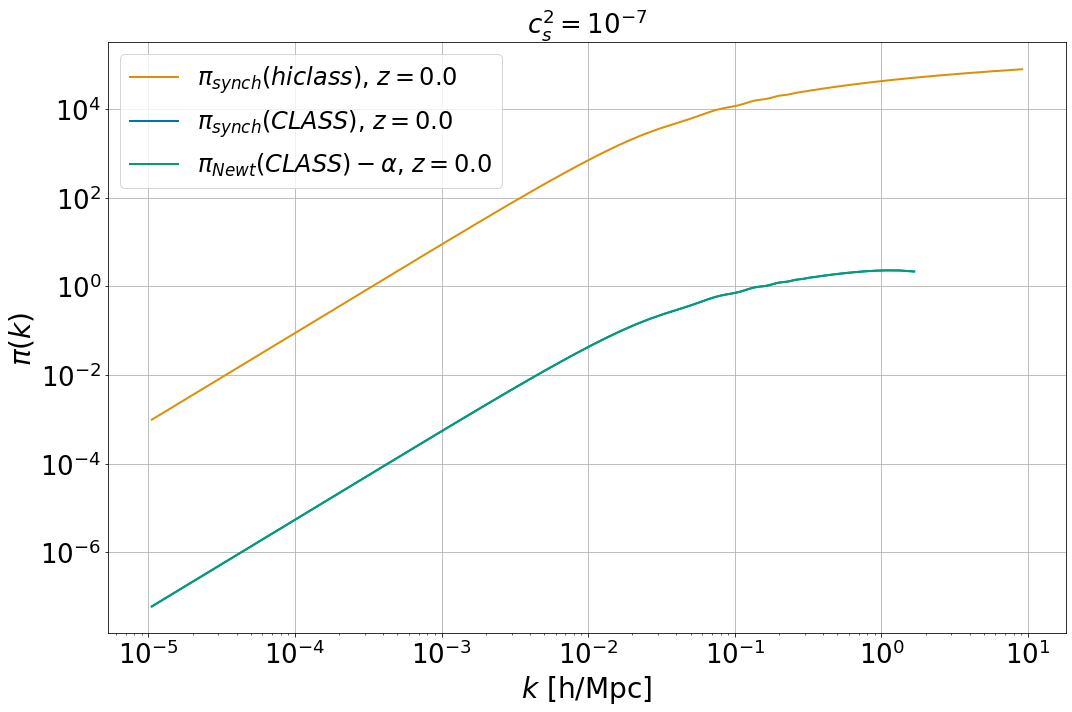

In [18]:

#########
####Plots
#########
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 26)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
l=0

for i in [19]:
    plt.plot(hiclass_cs2_em7[i][:,0], -(hiclass_cs2_em7[i][:,5]),"-",color=ColorsI[l+1],lw=2, label=r"$\pi_{synch} (hiclass)$, $z=$"+str(z_pk[i]))
    plt.plot(class_synch_cs2_em7[i][:,0], -(pi_synch_class_cs2_em7[i][:]),"-",color=ColorsI[l+0],lw=2, label=r"$\pi_{synch} (CLASS)$, $z=$"+str(z_pk[i]))
    plt.plot(class_cs2_em7[i][:,0], -(pi_newt_class_cs2_em7[i][:] - alpha_cs2_em7[i][:]),"-",color=ColorsI[l+2],lw=2, label=r"$\pi_{Newt}(CLASS)  - \alpha $, $z=$"+str(z_pk[i]))
    l=l+1
#     plt.plot(class_synch_cs1[i][:,0], (pi_synch_class_cs1[i][:]),"-",color=ColorsI[l+0],lw=2, label=r"$\alpha_B=0$, $z=$"+z_pk[i])


#     plt.semilogx(wcdm_w_m0d9_cs1_Mn_0d06[i][:,0], (wcdm_w_m0d9_cs1_Mn_0d06[i][:,column_wcdm]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1_Mn_0d06[i][:,0]))**power,color=ColorsI[l+5],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=1, \sum m_{\nu} = 0.06$ eV, z="+str(z_list[i]))
#     plt.semilogx(wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,0], (wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,column_wcdm]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,0]))**power,color=ColorsI[l+4],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=10^{-7}, \sum m_{\nu} = 0.06$ eV, z="+str(z_list[i]))

# plt.xlim(1e-4,1)
# plt.ylim(0.5,1.5)
plt.title("$c_s^2=10^{-7}$",fontsize=26)
plt.xscale('log')
plt.xlabel(r"$k$ [h/Mpc]",fontsize=28)
plt.ylabel(r"$\pi(k)$",fontsize=28)
plt.yscale('log')
plt.legend(fontsize=24)
plt.grid(True)
plt.tight_layout()
plt.show()


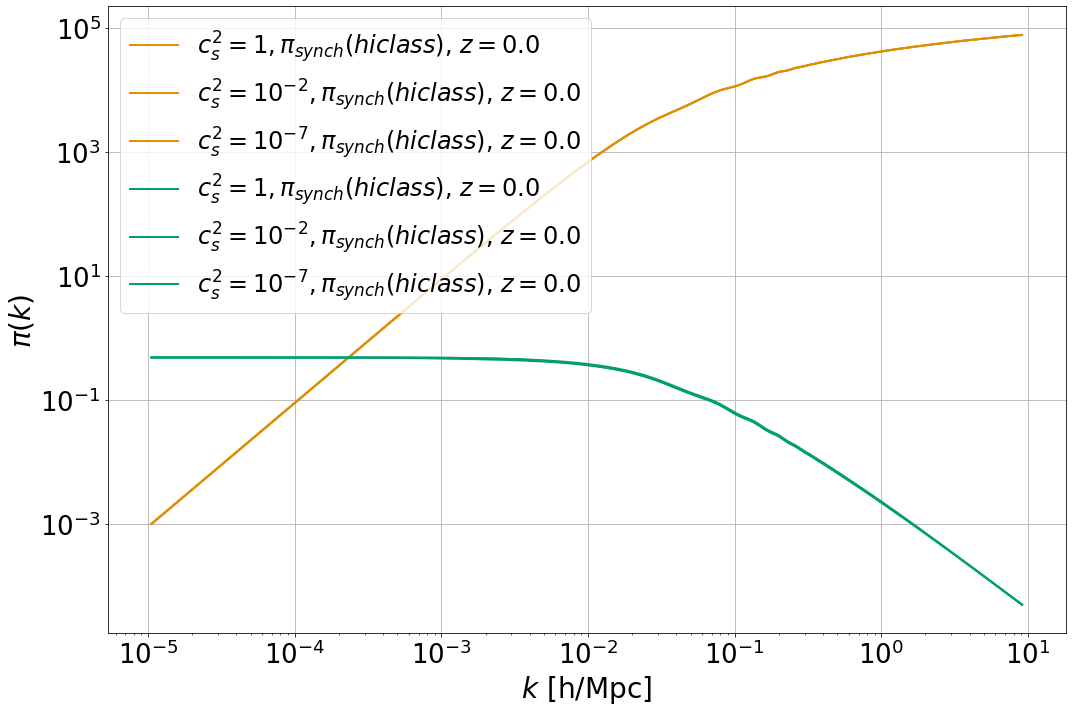

In [22]:

#########
####Plots
#########
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 26)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
l=0

for i in [19]:
    plt.plot(hiclass_cs1[i][:,0], -(hiclass_cs1[i][:,5]),"-",color=ColorsI[l+1],lw=2, label=r"$c_s^2 =1, \pi_{synch} (hiclass)$, $z=$"+str(z_pk[i]))
    plt.plot(hiclass_cs2_em2[i][:,0], -(hiclass_cs2_em2[i][:,5]),"-",color=ColorsI[l+1],lw=2, label=r"$c_s^2 =10^{-2}, \pi_{synch} (hiclass)$, $z=$"+str(z_pk[i]))
    plt.plot(hiclass_cs2_em7[i][:,0], -(hiclass_cs2_em7[i][:,5]),"-",color=ColorsI[l+1],lw=2, label=r"$c_s^2 =10^{-7} ,\pi_{synch} (hiclass)$, $z=$"+str(z_pk[i]))
    l=l+1
    
#     plt.plot(hiclass_cs1[i][:,0], (hiclass_cs1[i][:,6]),"-",color=ColorsI[l+1],lw=2, label=r"$c_s^2 =1, \pi_{synch} (hiclass)$, $z=$"+str(z_pk[i]))
#     plt.plot(hiclass_cs2_em2[i][:,0], (hiclass_cs2_em2[i][:,6]),"-",color=ColorsI[l+1],lw=2, label=r"$c_s^2 =10^{-2}, \pi_{synch} (hiclass)$, $z=$"+str(z_pk[i]))
#     plt.plot(hiclass_cs2_em7[i][:,0], (hiclass_cs2_em7[i][:,6]),"-",color=ColorsI[l+1],lw=2, label=r"$c_s^2 =10^{-7} ,\pi_{synch} (hiclass)$, $z=$"+str(z_pk[i]))
#     l=l+1
#     plt.plot(class_synch_cs1[i][:,0], (pi_synch_class_cs1[i][:]),"-",color=ColorsI[l+0],lw=2, label=r"$\alpha_B=0$, $z=$"+z_pk[i])


#     plt.semilogx(wcdm_w_m0d9_cs1_Mn_0d06[i][:,0], (wcdm_w_m0d9_cs1_Mn_0d06[i][:,column_wcdm]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1_Mn_0d06[i][:,0]))**power,color=ColorsI[l+5],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=1, \sum m_{\nu} = 0.06$ eV, z="+str(z_list[i]))
#     plt.semilogx(wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,0], (wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,column_wcdm]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,0]))**power,color=ColorsI[l+4],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=10^{-7}, \sum m_{\nu} = 0.06$ eV, z="+str(z_list[i]))

# plt.xlim(1e-4,1)
# plt.ylim(0.5,1.5)
# plt.title("$c_s^2=1$",fontsize=26)
plt.xscale('log')
plt.xlabel(r"$k$ [h/Mpc]",fontsize=28)
plt.ylabel(r"$\pi(k)$",fontsize=28)
plt.yscale('log')
plt.legend(fontsize=24)
plt.grid(True)
plt.tight_layout()
plt.show()


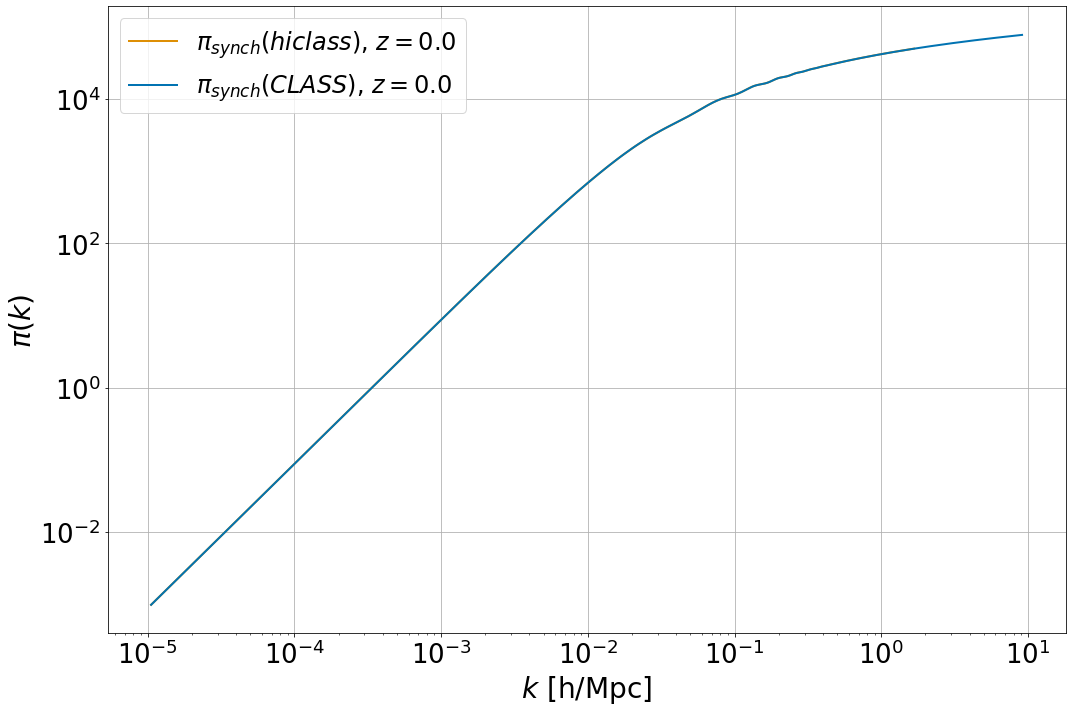

In [74]:

#########
####Plots
#########
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 26)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
l=0

for i in [19]:
    plt.plot(class_synch_cs1[i][:,0], np.abs(class_synch_cs1[i][:,3]),"-",color=ColorsI[l+1],lw=2, label=r"$\pi_{synch} (hiclass)$, $z=$"+str(z_pk[i]))
    plt.plot(hiclass_cs1[i][:,0], np.abs(hiclass_cs1[i][:,3]),"-",color=ColorsI[l+0],lw=2, label=r"$\pi_{synch} (CLASS)$, $z=$"+str(z_pk[i]))
#     plt.plot(class_newt_cs1[i][:,0], -(pi_newt_class_cs1[i][:] - alpha[i][:]),"-",color=ColorsI[l+2],lw=2, label=r"$\pi_{Newt}(CLASS)  - \alpha $, $z=$"+str(z_pk[i]))
    l=l+1
#     plt.plot(class_synch_cs1[i][:,0], (pi_synch_class_cs1[i][:]),"-",color=ColorsI[l+0],lw=2, label=r"$\alpha_B=0$, $z=$"+z_pk[i])


#     plt.semilogx(wcdm_w_m0d9_cs1_Mn_0d06[i][:,0], (wcdm_w_m0d9_cs1_Mn_0d06[i][:,column_wcdm]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1_Mn_0d06[i][:,0]))**power,color=ColorsI[l+5],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=1, \sum m_{\nu} = 0.06$ eV, z="+str(z_list[i]))
#     plt.semilogx(wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,0], (wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,column_wcdm]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,0]))**power,color=ColorsI[l+4],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=10^{-7}, \sum m_{\nu} = 0.06$ eV, z="+str(z_list[i]))

# plt.xlim(1e-4,1)
# plt.ylim(0.5,1.5)
plt.xscale('log')
plt.xlabel(r"$k$ [h/Mpc]",fontsize=28)
plt.ylabel(r"$\pi(k)$",fontsize=28)
plt.yscale('log')
plt.legend(fontsize=24)
plt.grid(True)
plt.tight_layout()
plt.show()


In [55]:

# #########
# ####Plots
# #########
# plt.figure(figsize=(15,10))
# ax = plt.gca()
# ax.tick_params(axis = 'both', which = 'major', labelsize = 26)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
# l=0

# for i in [19]:
# #     plt.plot(hiclass_cs1[i][:,0], -(pi_synch_class_cs1[i]),"-",color=ColorsI[l+1],lw=2, label=r"$\pi_{synch} (hiclass)$, $z=$"+str(z_pk[i]))
#     plt.plot(class_synch_cs1[i][:,0], np.abs(pi_synch_class_cs1[i][:]),"-",color=ColorsI[l+0],lw=2, label=r"$\pi_{synch} (CLASS)$, $z=$"+str(z_pk[i]))
#     plt.plot(class_newt_cs1[i][:,0], np.abs(pi_newt_class_cs1[i][:]),"-",color=ColorsI[l+2],lw=2, label=r"$\pi_{Newt}(CLASS)  - \alpha $, $z=$"+str(z_pk[i]))
#     l=l+1
# #     plt.plot(class_synch_cs1[i][:,0], (pi_synch_class_cs1[i][:]),"-",color=ColorsI[l+0],lw=2, label=r"$\alpha_B=0$, $z=$"+z_pk[i])


# #     plt.semilogx(wcdm_w_m0d9_cs1_Mn_0d06[i][:,0], (wcdm_w_m0d9_cs1_Mn_0d06[i][:,column_wcdm]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1_Mn_0d06[i][:,0]))**power,color=ColorsI[l+5],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=1, \sum m_{\nu} = 0.06$ eV, z="+str(z_list[i]))
# #     plt.semilogx(wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,0], (wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,column_wcdm]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,0]))**power,color=ColorsI[l+4],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=10^{-7}, \sum m_{\nu} = 0.06$ eV, z="+str(z_list[i]))

# # plt.xlim(1e-4,1)
# # plt.ylim(0.5,1.5)
# plt.xscale('log')
# plt.xlabel(r"$k$ [h/Mpc]",fontsize=28)
# plt.ylabel(r"$\pi(k)$",fontsize=28)
# plt.yscale('log')
# plt.legend(fontsize=24)
# plt.grid(True)
# plt.tight_layout()
# plt.show()


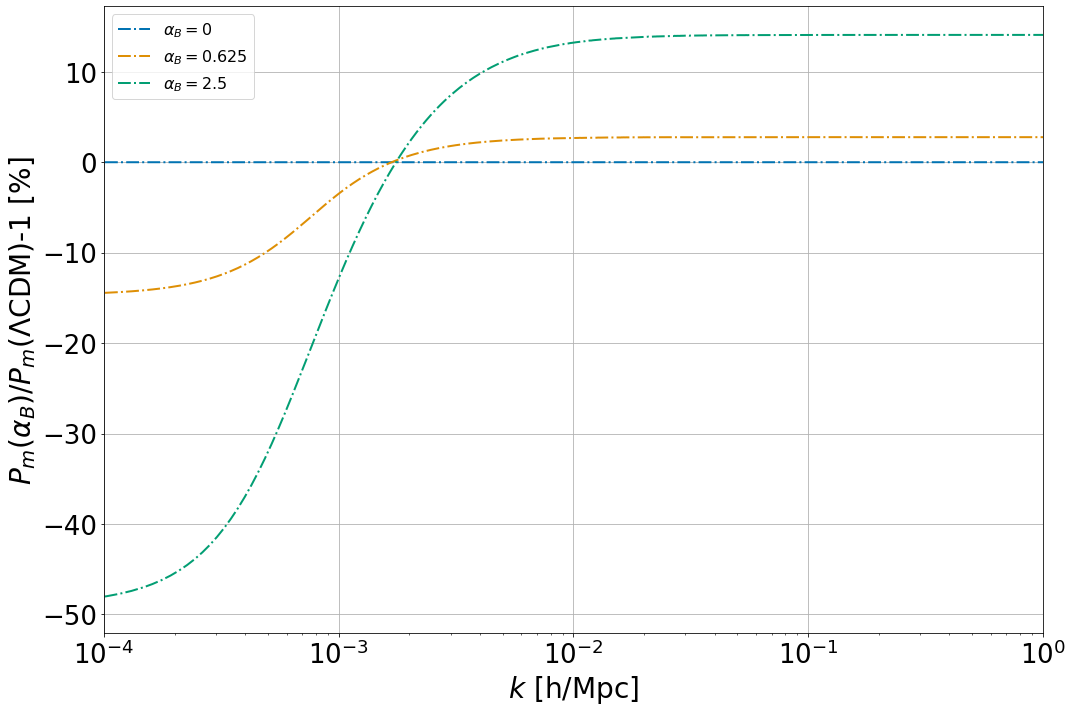

In [33]:

#########
####Plots
#########
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 26)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
l=0

plt.semilogx(alpha_B_0_pk[:,0], (alpha_B_0_pk[:,1]/Lambda_pk[:,1]-1)*100,"-.",color=ColorsI[l+0],lw=2, label=r"$\alpha_B=0$")
plt.semilogx(alpha_B_0_pk[:,0], (alpha_B_0d625_pk[:,1]/Lambda_pk[:,1]-1)*100,"-.",color=ColorsI[l+1],lw=2, label=r"$\alpha_B=0.625$")
plt.semilogx(alpha_B_0_pk[:,0], (alpha_B_2d5_pk[:,1]/Lambda_pk[:,1]-1)*100,"-.",color=ColorsI[l+2],lw=2, label=r"$\alpha_B=2.5$")


#     plt.semilogx(wcdm_w_m0d9_cs1_Mn_0d06[i][:,0], (wcdm_w_m0d9_cs1_Mn_0d06[i][:,column_wcdm]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1_Mn_0d06[i][:,0]))**power,color=ColorsI[l+5],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=1, \sum m_{\nu} = 0.06$ eV, z="+str(z_list[i]))
#     plt.semilogx(wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,0], (wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,column_wcdm]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,0]))**power,color=ColorsI[l+4],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=10^{-7}, \sum m_{\nu} = 0.06$ eV, z="+str(z_list[i]))

plt.xlim(1e-4,1)
# plt.ylim(0.5,1.5)
plt.xlabel(r"$k$ [h/Mpc]",fontsize=28)
plt.ylabel(r"$P_m({\alpha_B})/P_m(\Lambda$CDM)-1 [%]",fontsize=28)
plt.legend(fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


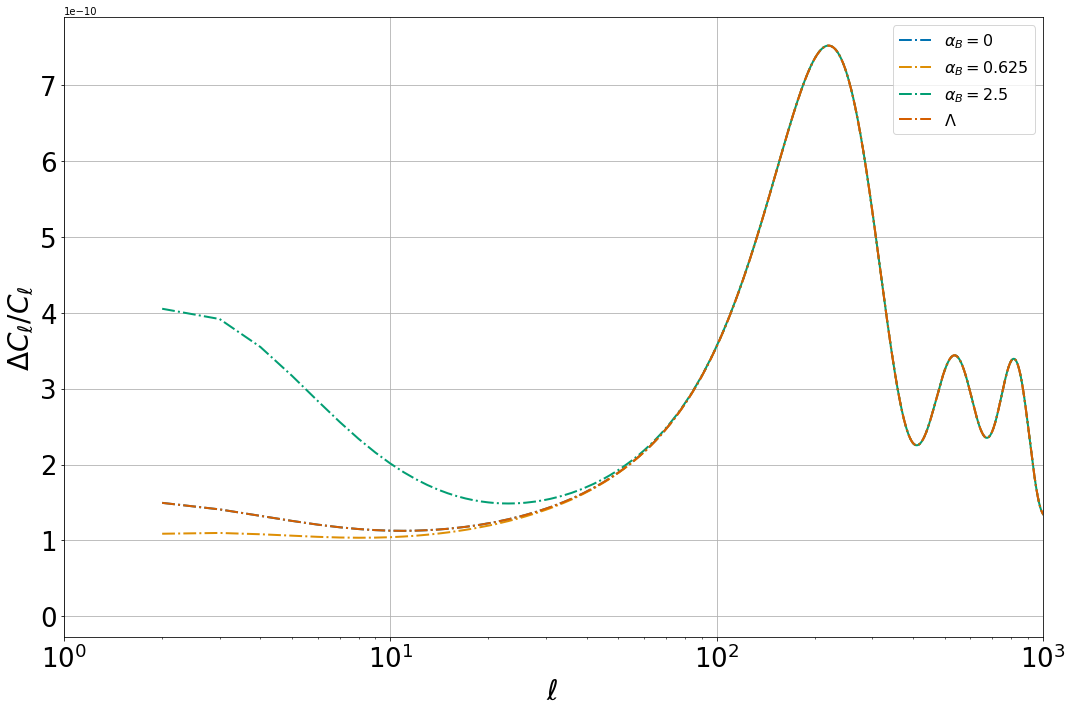

In [45]:

#########
####Plots
#########
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 26)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
l=0

plt.semilogx(alpha_B_0_cl[:,0], (alpha_B_0_cl[:,1]),"-.",color=ColorsI[l+0],lw=2, label=r"$\alpha_B=0$")
plt.semilogx(alpha_B_0d625_cl[:,0], (alpha_B_0d625_cl[:,1]),"-.",color=ColorsI[l+1],lw=2, label=r"$\alpha_B=0.625$")
plt.semilogx(alpha_B_2d5_cl[:,0], (alpha_B_2d5_cl[:,1]),"-.",color=ColorsI[l+2],lw=2, label=r"$\alpha_B=2.5$")
plt.semilogx(Lambda_cl[:,0], (Lambda_cl[:,1]),"-.",color=ColorsI[l+3],lw=2, label=r"$\Lambda$")


#     plt.semilogx(wcdm_w_m0d9_cs1_Mn_0d06[i][:,0], (wcdm_w_m0d9_cs1_Mn_0d06[i][:,column_wcdm]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1_Mn_0d06[i][:,0]))**power,color=ColorsI[l+5],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=1, \sum m_{\nu} = 0.06$ eV, z="+str(z_list[i]))
#     plt.semilogx(wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,0], (wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,column_wcdm]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,0]))**power,color=ColorsI[l+4],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=10^{-7}, \sum m_{\nu} = 0.06$ eV, z="+str(z_list[i]))

plt.xlim(1,1000)
# plt.ylim(0.886,1.01)
plt.xlabel(r"$\ell$ ",fontsize=28)
plt.ylabel(r"$\Delta C_{\ell}/C_{\ell}$",fontsize=28)
plt.legend(fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

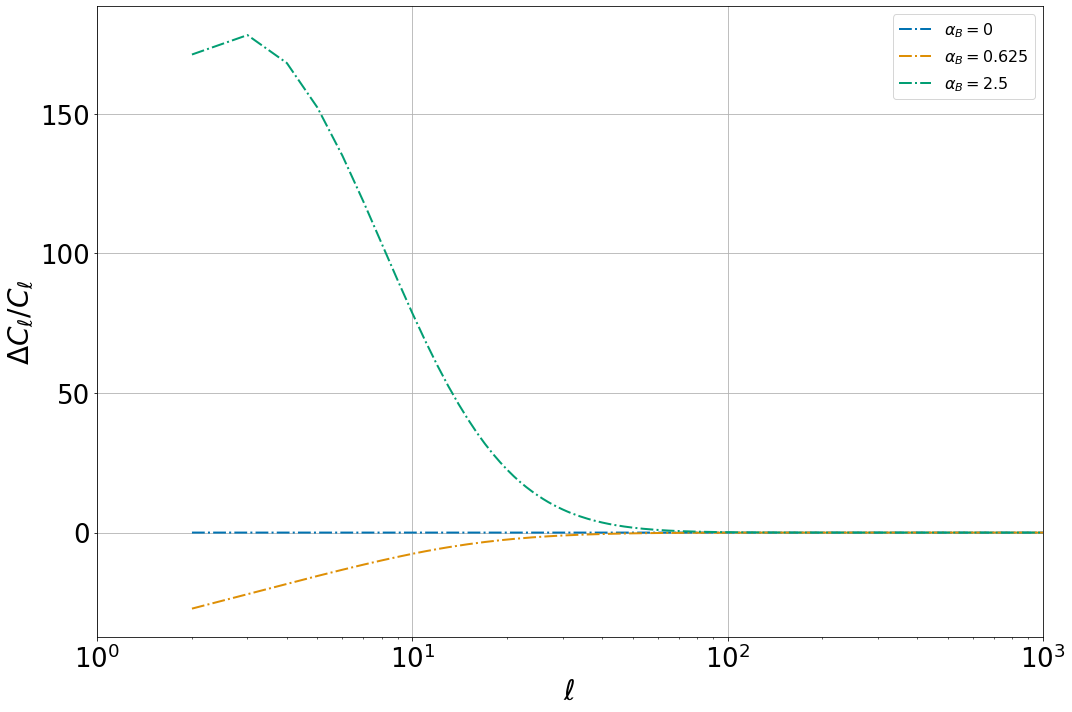

In [47]:

#########
####Plots
#########
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 26)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
l=0

plt.semilogx(alpha_B_0_cl[:,0], (alpha_B_0_cl[:,1]/Lambda_cl[:,1]-1)*100,"-.",color=ColorsI[l+0],lw=2, label=r"$\alpha_B=0$")
plt.semilogx(alpha_B_0d625_cl[:,0], (alpha_B_0d625_cl[:,1]/Lambda_cl[:,1]-1)*100,"-.",color=ColorsI[l+1],lw=2, label=r"$\alpha_B=0.625$")
plt.semilogx(alpha_B_2d5_cl[:,0], (alpha_B_2d5_cl[:,1]/Lambda_cl[:,1]-1)*100,"-.",color=ColorsI[l+2],lw=2, label=r"$\alpha_B=2.5$")


#     plt.semilogx(wcdm_w_m0d9_cs1_Mn_0d06[i][:,0], (wcdm_w_m0d9_cs1_Mn_0d06[i][:,column_wcdm]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1_Mn_0d06[i][:,0]))**power,color=ColorsI[l+5],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=1, \sum m_{\nu} = 0.06$ eV, z="+str(z_list[i]))
#     plt.semilogx(wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,0], (wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,column_wcdm]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1em7_Mn_0d06[i][:,0]))**power,color=ColorsI[l+4],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=10^{-7}, \sum m_{\nu} = 0.06$ eV, z="+str(z_list[i]))

plt.xlim(1,1000)
# plt.ylim(0.886,1.01)
plt.xlabel(r"$\ell$ ",fontsize=28)
plt.ylabel(r"$\Delta C_{\ell}/C_{\ell}$",fontsize=28)
plt.legend(fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:

# #########
# ####Plots
# #########
# plt.figure(figsize=(15,10))
# ax = plt.gca()
# ax.tick_params(axis = 'both', which = 'major', labelsize = 26)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
# l=0
# # for i in [8,9,16]:
# for i in [9]:

# #     plt.semilogx(lcdm_Mn_0d05[i][:,0], lcdm_Mn_0d05[i][:,1]/interp_lcdm_massless[i](lcdm_Mn_0d05[i][:,0]),color=ColorsI[l],lw=3, label=r"$X \to \Lambda$CDM $, \sum m_{\nu} = 0.05$ eV, z="+str(z_list[i]))
# #     plt.semilogx(lcdm_Mn_0d10[i][:,0], lcdm_Mn_0d10[i][:,1]/interp_lcdm_massless[i](lcdm_Mn_0d10[i][:,0]),color=ColorsI[l+1],lw=3, label=r"$X \to \Lambda$CDM $, \sum m_{\nu} = 0.10$ eV, z="+str(z_list[i]))
# #     plt.semilogx(lcdm_Mn_0d13[i][:,0], lcdm_Mn_0d13[i][:,1]/interp_lcdm_massless[i](lcdm_Mn_0d13[i][:,0]),color=ColorsI[l+1],lw=3, label=r"$X \to \Lambda$CDM $, \sum m_{\nu} = 0.13$ eV, z="+str(z_list[i]))
#     plt.semilogx(lcdm_Mn_0d14[i][:,0], lcdm_Mn_0d14[i][:,1]/interp_lcdm_massless[i](lcdm_Mn_0d14[i][:,0]),color=ColorsI[l+1],lw=3, label=r"$X \to \Lambda$CDM $, \sum m_{\nu} = 0.14$ eV, z="+str(z_list[i]))
#     plt.semilogx(lcdm_Mn_0d18[i][:,0], lcdm_Mn_0d18[i][:,1]/interp_lcdm_massless[i](lcdm_Mn_0d18[i][:,0]),color=ColorsI[l+2],lw=3, label=r"$X \to \Lambda$CDM $, \sum m_{\nu} = 0.18$ eV, z="+str(z_list[i]))
#     plt.semilogx(lcdm_Mn_0d23[i][:,0], lcdm_Mn_0d23[i][:,1]/interp_lcdm_massless[i](lcdm_Mn_0d23[i][:,0]),color=ColorsI[l+3],lw=3, label=r"$X \to \Lambda$CDM $, \sum m_{\nu} = 0.23$ eV, z="+str(z_list[i]))

#     #     plt.semilogx(lcdm_Mn_0d3[i][:,0], lcdm_Mn_0d3[i][:,1]/interp_lcdm_massless[i](lcdm_Mn_0d3[i][:,0]),color=ColorsI[l+3],lw=3, label=r"$X \to \Lambda$CDM $, \sum m_{\nu} = 0.3$ eV, z="+str(z_list[i]))
#     plt.semilogx(wcdm_w_m0d9_cs1_Mn_0d05[i][:,0], wcdm_w_m0d9_cs1_Mn_0d05[i][:,1]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1_Mn_0d05[i][:,0]),color=ColorsI[l+5],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=1, \sum m_{\nu} = 0.05$ eV, z="+str(z_list[i]))

#     plt.semilogx(wcdm_w_m0d9_cs1em4_Mn_0d1[i][:,0], wcdm_w_m0d9_cs1em4_Mn_0d1[i][:,1]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1em4_Mn_0d1[i][:,0]),color=ColorsI[l+4],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=10^{-4}, \sum m_{\nu} = 0.1$ eV, z="+str(z_list[i]))
# #     plt.semilogx(lcdm_Mn_0d16[i][:,0], lcdm_Mn_0d16[i][:,1]/interp_lcdm_massless[i](lcdm_Mn_0d16[i][:,0]),color=ColorsI[l+2],lw=3, label=r"$X \to \Lambda$CDM $, \sum m_{\nu} = 0.16$ eV, z="+str(z_list[i]))
# #     plt.semilogx(wcdm_w_m0d9_cs1em4_Mn_0d05[i][:,0], wcdm_w_m0d9_cs1em4_Mn_0d05[i][:,1]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1em4_Mn_0d05[i][:,0]),color=ColorsI[l+4],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=10^{-4}, \sum m_{\nu} = 0.05$ eV, z="+str(z_list[i]))
# #     plt.semilogx(wcdm_w_m0d9_cs1_Mn_0d07[i][:,0], wcdm_w_m0d9_cs1_Mn_0d07[i][:,1]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1_Mn_0d07[i][:,0]),color=ColorsI[l+4],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=1, \sum m_{\nu} = 0.07$ eV, z="+str(z_list[i]))

    
#     plt.semilogx(wcdm_w_m0d9_cs1em7_Mn_0d16[i][:,0], wcdm_w_m0d9_cs1em7_Mn_0d16[i][:,1]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1em7_Mn_0d16[i][:,0]),color=ColorsI[l+6],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=10^{-7}, \sum m_{\nu} = 0.16$ eV, z="+str(z_list[i]))

# #     l=l+3
# plt.xlim(1e-4,20)
# plt.ylim(0.7,1.1)
# plt.xlabel(r"$k$ [h/Mpc]",fontsize=28)
# plt.ylabel(r"$P_m^{NL}(X)/P_m^{NL}(\Lambda$CDM)",fontsize=28)
# plt.legend(fontsize=16)
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [8]:

# #########
# ####Plots
# #########
# plt.figure(figsize=(15,10))
# ax = plt.gca()
# ax.tick_params(axis = 'both', which = 'major', labelsize = 26)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)
# l=0
# # for i in [8,9,16]:
# for i in [8]:

# #     plt.semilogx(lcdm_Mn_0d05[i][:,0], lcdm_Mn_0d05[i][:,1]/interp_lcdm_massless[i](lcdm_Mn_0d05[i][:,0]),color=ColorsI[l],lw=3, label=r"$X \to \Lambda$CDM $, \sum m_{\nu} = 0.05$ eV, z="+str(z_list[i]))
# #     plt.semilogx(lcdm_Mn_0d10[i][:,0], lcdm_Mn_0d10[i][:,1]/interp_lcdm_massless[i](lcdm_Mn_0d10[i][:,0]),color=ColorsI[l+1],lw=3, label=r"$X \to \Lambda$CDM $, \sum m_{\nu} = 0.10$ eV, z="+str(z_list[i]))
# #     plt.semilogx(lcdm_Mn_0d13[i][:,0], lcdm_Mn_0d13[i][:,1]/interp_lcdm_massless[i](lcdm_Mn_0d13[i][:,0]),color=ColorsI[l+1],lw=3, label=r"$X \to \Lambda$CDM $, \sum m_{\nu} = 0.13$ eV, z="+str(z_list[i]))
#     plt.semilogx(lcdm_Mn_0d14[i][:,0], lcdm_Mn_0d14[i][:,1]/interp_lcdm_massless[i](lcdm_Mn_0d14[i][:,0]),color=ColorsI[l+1],lw=3, label=r"$X \to \Lambda$CDM $, \sum m_{\nu} = 0.14$ eV, z="+str(z_list[i]))
#     plt.semilogx(lcdm_Mn_0d18[i][:,0], lcdm_Mn_0d18[i][:,1]/interp_lcdm_massless[i](lcdm_Mn_0d18[i][:,0]),color=ColorsI[l+2],lw=3, label=r"$X \to \Lambda$CDM $, \sum m_{\nu} = 0.18$ eV, z="+str(z_list[i]))
#     plt.semilogx(lcdm_Mn_0d23[i][:,0], lcdm_Mn_0d23[i][:,1]/interp_lcdm_massless[i](lcdm_Mn_0d23[i][:,0]),color=ColorsI[l+3],lw=3, label=r"$X \to \Lambda$CDM $, \sum m_{\nu} = 0.23$ eV, z="+str(z_list[i]))

#     #     plt.semilogx(lcdm_Mn_0d3[i][:,0], lcdm_Mn_0d3[i][:,1]/interp_lcdm_massless[i](lcdm_Mn_0d3[i][:,0]),color=ColorsI[l+3],lw=3, label=r"$X \to \Lambda$CDM $, \sum m_{\nu} = 0.3$ eV, z="+str(z_list[i]))
#     plt.semilogx(wcdm_w_m0d9_cs1_Mn_0d05[i][:,0], wcdm_w_m0d9_cs1_Mn_0d05[i][:,1]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1_Mn_0d05[i][:,0]),color=ColorsI[l+5],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=1, \sum m_{\nu} = 0.05$ eV, z="+str(z_list[i]))
#     plt.semilogx(wcdm_w_m0d9_cs1em4_Mn_0d1[i][:,0], wcdm_w_m0d9_cs1em4_Mn_0d1[i][:,1]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1em4_Mn_0d1[i][:,0]),color=ColorsI[l+4],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=10^{-4}, \sum m_{\nu} = 0.1$ eV, z="+str(z_list[i]))
#     plt.semilogx(wcdm_w_m0d9_cs1em7_Mn_0d16[i][:,0], wcdm_w_m0d9_cs1em7_Mn_0d16[i][:,1]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1em7_Mn_0d16[i][:,0]),color=ColorsI[l+6],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=10^{-7}, \sum m_{\nu} = 0.16$ eV, z="+str(z_list[i]))

#     #     plt.semilogx(lcdm_Mn_0d16[i][:,0], lcdm_Mn_0d16[i][:,1]/interp_lcdm_massless[i](lcdm_Mn_0d16[i][:,0]),color=ColorsI[l+2],lw=3, label=r"$X \to \Lambda$CDM $, \sum m_{\nu} = 0.16$ eV, z="+str(z_list[i]))
# #     plt.semilogx(wcdm_w_m0d9_cs1em4_Mn_0d05[i][:,0], wcdm_w_m0d9_cs1em4_Mn_0d05[i][:,1]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1em4_Mn_0d05[i][:,0]),color=ColorsI[l+4],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=10^{-4}, \sum m_{\nu} = 0.05$ eV, z="+str(z_list[i]))
# #     plt.semilogx(wcdm_w_m0d9_cs1_Mn_0d07[i][:,0], wcdm_w_m0d9_cs1_Mn_0d07[i][:,1]/interp_lcdm_massless[i](wcdm_w_m0d9_cs1_Mn_0d07[i][:,0]),color=ColorsI[l+4],lw=3, label=r"$X \to w$CDM$, $w=-0.9, $c_s^2=1, \sum m_{\nu} = 0.07$ eV, z="+str(z_list[i]))

    

#     l=l+3
# plt.xlim(1e-4,20)
# plt.ylim(0.7,1.1)
# plt.xlabel(r"$k$ [h/Mpc]",fontsize=28)
# plt.ylabel(r"$P_m^{NL}(X)/P_m^{NL}(\Lambda$CDM)",fontsize=28)
# plt.legend(fontsize=16)
# plt.grid(True)
# plt.tight_layout()
# plt.show()
